## Imports

In [6]:
%env TF_FORCE_UNIFIED_MEMORY=1

env: TF_FORCE_UNIFIED_MEMORY=1


In [7]:
import unlimtd_f
import time
from jax import random
import dataset_multi_infinite
import dataset_sines_infinite
import dataset_lines_infinite
import test
import plots
import ntk
import nll
from jax import numpy as np
import pickle
import models
import utils
from matplotlib import pyplot as plt

## Option #1: training the network in this notebook

In [8]:
seed = 1655235988902897757
print(seed)

1655235988902897757


In [5]:
init_params, pre_state, pre_evals, post_state, pre_losses, post_losses, post_evals = unlimtd_f.unlimtd_f_multi_modal_singGP(seed=seed,
                                                                                     pre_n_epochs=10000,
                                                                                     pre_n_tasks=24,
                                                                                     pre_K=10,
                                                                                     post_n_epochs=10000,
                                                                                     post_n_tasks=24,
                                                                                     post_K=10,
                                                                                     data_noise=0.05, 
                                                                                     maddox_noise=0.05,
                                                                                     meta_lr=0.001,
                                                                                     subspace_dimension=10)

This is UNLIMTD-F
For the multi-modal dataset: sine + line (both infinite)
This variant of UNLIMTD-F approaches the distribution with a single GP
Creating model
Creating optimizers
Starting first part of training (identity covariance)
Starting training with:
-n_epochs=10000
-n_tasks=24
-K=10
-data_noise=0.05
-maddox_noise=0.05
0  | 892.8888 (2.8662 s)
Eval: (Array(882.4737, dtype=float32), Array(2.4531503, dtype=float32))
10  | 401.8914 (0.0274 s)
20  | 293.4236 (0.0271 s)
30  | 297.2233 (0.0257 s)
40  | 162.3926 (0.0257 s)
50  | 90.2323 (0.0302 s)
60  | 39.7125 (0.0271 s)
70  | 31.3531 (0.0257 s)
80  | 78.6514 (0.0261 s)
90  | 52.4289 (0.0262 s)
100  | 54.2259 (0.0273 s)
110  | 41.8717 (0.0278 s)
120  | 42.3896 (0.0311 s)
130  | 32.0566 (0.0257 s)
140  | 33.3738 (0.0257 s)
150  | 28.7370 (0.0256 s)
160  | 33.1552 (0.0261 s)
170  | 23.4515 (0.0256 s)
180  | 22.7606 (0.0259 s)
190  | 17.5501 (0.0257 s)
200  | 16.7505 (0.0259 s)
210  | 36.3057 (0.0257 s)
220  | 25.0648 (0.0267 s)
230  | 

In [6]:
output = {}
output["seed"] = seed
output["pre_n_epochs"]=30000
output["pre_n_tasks"]=24
output["pre_K"]=10
output["post_n_epochs"]=30000
output["post_n_tasks"]=24
output["post_K"]=10
output["data_noise"]=0.05
output["maddox_noise"]=0.05
output["meta_lr"]=0.001
output["subspace_dimension"]=10
output["pre_losses"]=pre_losses
output["post_losses"]=post_losses
output["init_params"]=init_params
output["intermediate_params"]=pre_state.params
output["trained_params"]=post_state.params
output["intermediate_mean"]=pre_state.mean
output["trained_mean"]=post_state.mean
output["intermediate_batch_stats"]=pre_state.batch_stats
output["trained_batch_stats"]=post_state.batch_stats
output["trained_scale"]=post_state.scale
output["proj"]=post_state.proj
output["pre_evals"]=pre_evals
output["post_evals"]=post_evals

In [7]:
with open("logs_final/multi_single_fim.pickle", "wb") as handle:
    pickle.dump(output, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Option #2: loading a previously trained network

In [9]:
with open("logs_final/multi_single_fim.pickle", "rb") as handle:
    output = pickle.load(handle)

## Testing the trained network

In [10]:
model = models.small_network(40, "relu", 1)
apply_fn = utils.apply_fn_wrapper(model.apply, False)

In [11]:
kernel, kernel_self, jac = ntk.get_kernel_and_jac_lowdim_cov(apply_fn, output["trained_params"], output["trained_scale"], output["trained_batch_stats"], output["proj"])

In [12]:
key = random.PRNGKey(0)

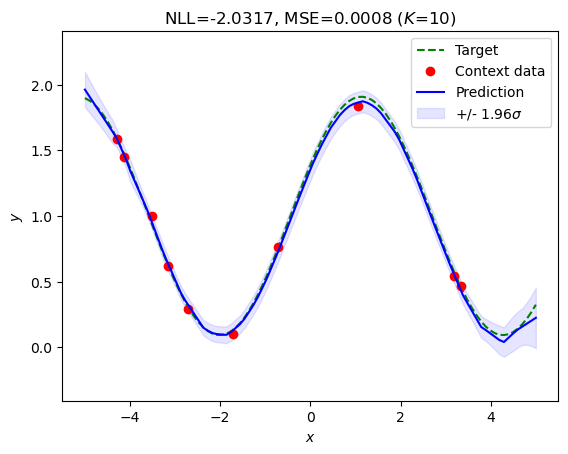

In [20]:
key, subkey = random.split(key)
plots.plot_notebooks(subkey, kernel, kernel_self, jac, output["trained_mean"], 10, dataset_sines_infinite)

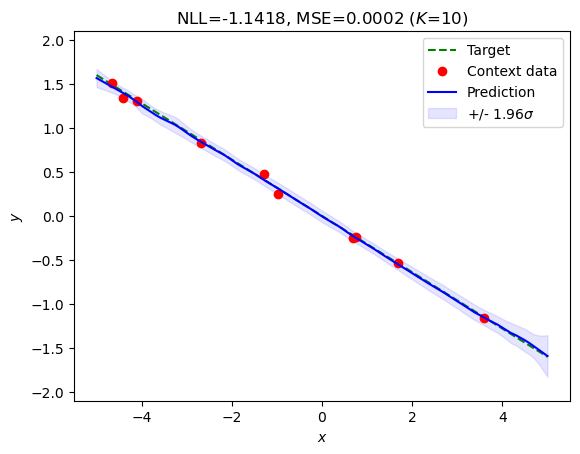

In [21]:
key, subkey = random.split(key)
plots.plot_notebooks(subkey, kernel, kernel_self, jac, output["trained_mean"], 10, dataset_lines_infinite)